In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scvelo as scv
import cellrank as cr

In [2]:
from cellrank import kernels as crpk

In [3]:
from cellrank.estimators import GPCCA

In [4]:
cr.settings.verbosity = 2
#sc.settings.set_figure_params(frameon=False, dpi=100)

In [5]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

In [7]:
from matplotlib import font_manager
font_path = '/myriad-pro-cufonfonts/MYRIADPRO-REGULAR.OTF'
font_manager.fontManager.addfont(font_path)
myfont = font_manager.FontProperties(fname=font_path)

In [8]:
adata_pan_deepvel = sc.read_h5ad('/new_adata_pancreas_deepVelo_Jul11.h5ad')
adata_pan_det = sc.read_h5ad('/new_adata_pancreas_deterministic_Jul11.h5ad')
adata_pan_dyn = sc.read_h5ad('/new_adata_pancreas_scVelo_dynamical_Jul11.h5ad')
adata_pan_sto = sc.read_h5ad('/new_adata_pancreas_stochastic_Jul11.h5ad')
adata_pan_unitvelo = sc.read_h5ad('/new_adata_pancreas_uniTVelo_Jul11.h5ad')

# Run CellRank with Velocity prediction as kernel for each velocity method

## We repeat this same analyses to get the driver genes for each method.

### DeepVelo Kernel

In [9]:
deepvel_kernel = crpk.VelocityKernel(adata_pan_deepvel, backward=False, attr='layers', vkey='velocity')

In [10]:
deepvel_kernel.compute_transition_matrix()

Computing transition matrix using `'deterministic'` model


  0%|          | 0/3696 [00:00<?, ?cell/s]

Using `softmax_scale=6.9246`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:03)


VelocityKernel[n=3696, model='deterministic', similarity='correlation', softmax_scale=6.925]

In [11]:
g = cr.estimators.GPCCA(deepvel_kernel)
print(g)

GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=None]


In [12]:
g.fit(cluster_key="clusters", n_states=8)

Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `8` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:02)


GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=None]

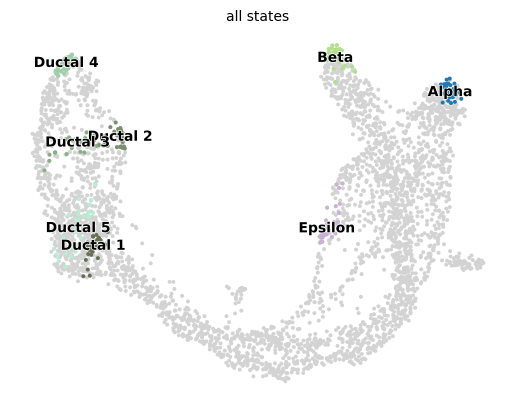

In [13]:
g.plot_macrostates(which='all', #save='DeepVelo_crmacrostates_Nov4.pdf'
                  )

We set the terminal states to the terminal state cell types in pancreas

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


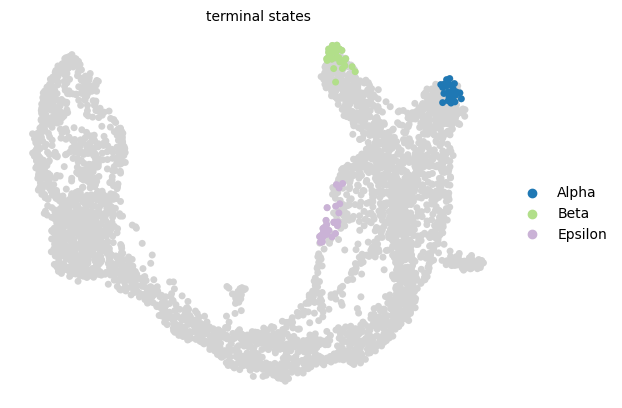

In [14]:
g.set_terminal_states(states=["Alpha", "Beta", "Epsilon"])
g.plot_macrostates(which="terminal", legend_loc="right", size=100)


Computing fate probabilities


  0%|          | 0/3 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range


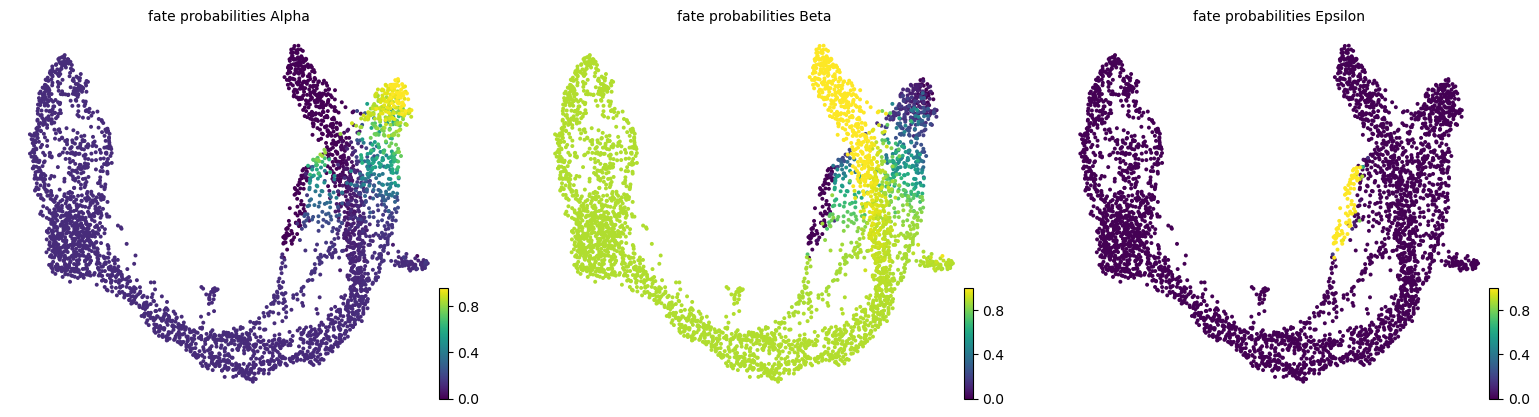

In [15]:
g.compute_fate_probabilities()
g.plot_fate_probabilities(same_plot=False)


We calculate the driver genes for each terminal state (the genes most highly correlated with the terminal state, 'Beta_corr')

In [25]:
beta_df_deep = g.compute_lineage_drivers(
    lineages=["Beta"])
beta_df_deep.head(3)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


,Beta_corr,Beta_pval,Beta_qval,Beta_ci_low,Beta_ci_high
index,,,,,
Rplp0,0.357596,1.987999e-114,1.728695e-112,0.329150,0.385394
Nkx6-1,0.357143,4.077730e-114,3.398109e-112,0.328687,0.384951
Tmsb10,0.343197,8.934137e-105,6.617879e-103,0.314436,0.371330


### Velocyto (scVelo-Deterministic) Kernel

In [26]:
det_kernel = crpk.VelocityKernel(adata_pan_det, backward=False, attr='layers', vkey='velocity')
det_kernel.compute_transition_matrix()


Computing transition matrix using `'deterministic'` model


  0%|          | 0/3696 [00:00<?, ?cell/s]

Using `softmax_scale=12.5208`


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:03)


------------------------------------------------------------------------
[0]PETSC ERROR: 

VelocityKernel[n=3696, model='deterministic', similarity='correlation', softmax_scale=12.521]

In [20]:
d = cr.estimators.GPCCA(det_kernel)
print(d)

GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=None]


Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[8]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `9` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:14)


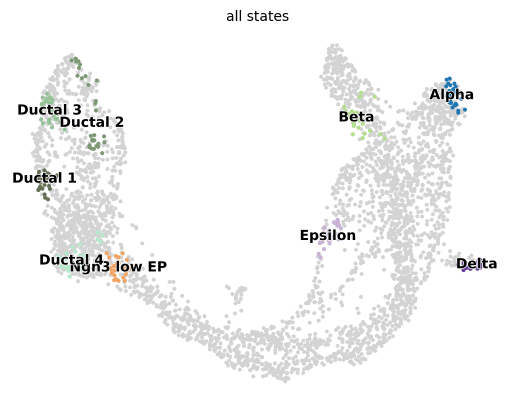

In [21]:
d.fit(cluster_key="clusters", n_states=8)
d.plot_macrostates(which='all')

In [22]:
d.set_terminal_states(states=["Alpha", "Beta", "Epsilon", 'Delta'])

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=['Alpha', 'Beta', 'Delta', 'Epsilon']]

In [23]:
d.compute_fate_probabilities()

Computing fate probabilities


  0%|          | 0/4 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: ------------------------------------------------------------------------


In [24]:
beta_df_det = d.compute_lineage_drivers(
    lineages=["Beta"])
beta_df_det.head(3)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


,Beta_corr,Beta_pval,Beta_qval,Beta_ci_low,Beta_ci_high
index,,,,,
Tmsb10,0.417267,1.294202e-160,1.480720e-158,0.390277,0.443541
Nkx6-1,0.415201,7.772586e-159,8.398711e-157,0.388156,0.441532
Rplp0,0.406748,1.061053e-151,9.827373e-150,0.379484,0.433307


### UniTVelo Kernel

In [28]:
uni_kernel = crpk.VelocityKernel(adata_pan_unitvelo, backward=False, attr='layers', vkey='velocity')
uni_kernel.compute_transition_matrix()


Computing transition matrix using `'deterministic'` model


  0%|          | 0/3696 [00:00<?, ?cell/s]

Using `softmax_scale=4.8321`


[0]PETSC ERROR: 

  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:04)


[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: 

VelocityKernel[n=3696, model='deterministic', similarity='correlation', softmax_scale=4.832]

In [29]:
u = cr.estimators.GPCCA(uni_kernel)

Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `8` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:02)


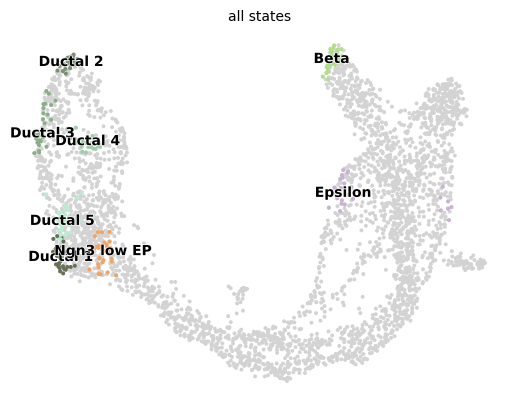

In [30]:
u.fit(cluster_key="clusters", n_states=8)
u.plot_macrostates(which='all', #save='unitvelo_pancreas_macrostates_cr'
                  )

In [31]:
u.set_terminal_states(states=["Beta", "Epsilon"])

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=['Beta', 'Epsilon']]

Computing fate probabilities


  0%|          | 0/2 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: 

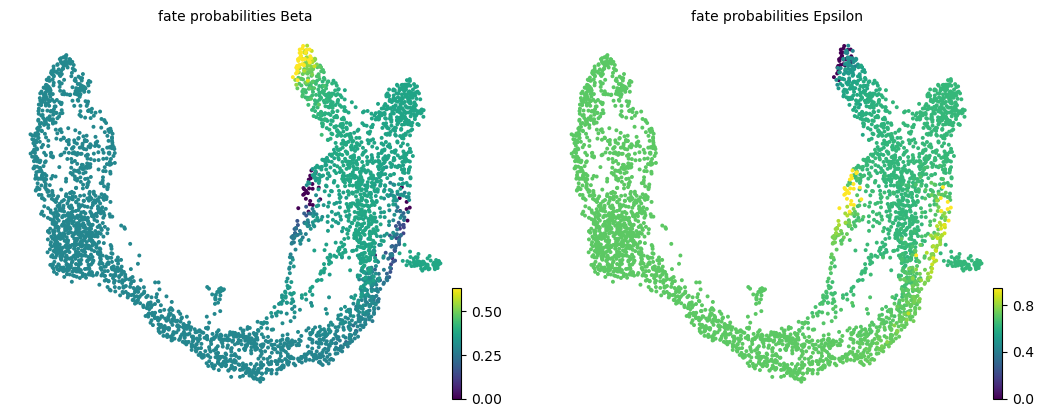

In [32]:
u.compute_fate_probabilities()
u.plot_fate_probabilities(same_plot=False)

In [33]:
beta_df_unit = u.compute_lineage_drivers(
    lineages=["Beta"])
beta_df_unit.head(3)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


,Beta_corr,Beta_pval,Beta_qval,Beta_ci_low,Beta_ci_high
index,,,,,
Ins2,0.645063,0.0,0.0,0.625838,0.663505
Ins1,0.631468,0.0,0.0,0.611680,0.650466
Ppp1r1a,0.623474,0.0,0.0,0.603361,0.642794


### scVelo-stochastic Kernel

In [34]:
sto_kernel = crpk.VelocityKernel(adata_pan_sto, backward=False, attr='layers', vkey='velocity')
sto_kernel.compute_transition_matrix()


Computing transition matrix using `'deterministic'` model


  0%|          | 0/3696 [00:00<?, ?cell/s]

Using `softmax_scale=14.7459`


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: 

  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:03)


[0]PETSC ERROR: ------------------------------------------------------------------------


VelocityKernel[n=3696, model='deterministic', similarity='correlation', softmax_scale=14.746]

In [35]:
s = cr.estimators.GPCCA(sto_kernel)

Computing Schur decomposition
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `8` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:02)


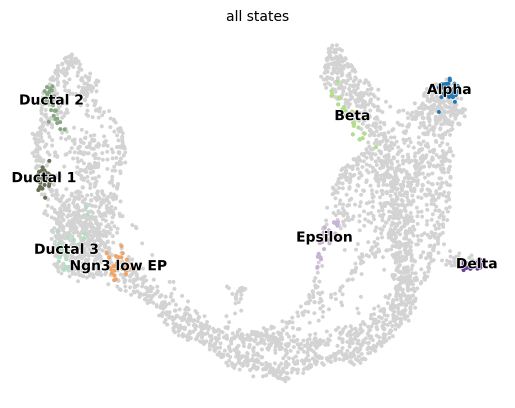

In [36]:
s.fit(cluster_key="clusters", n_states=8)
s.plot_macrostates(which='all')

In [37]:
s.set_terminal_states(states=["Alpha", "Beta", "Epsilon", 'Delta'])

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=['Alpha', 'Beta', 'Delta', 'Epsilon']]

Computing fate probabilities


  0%|          | 0/4 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range


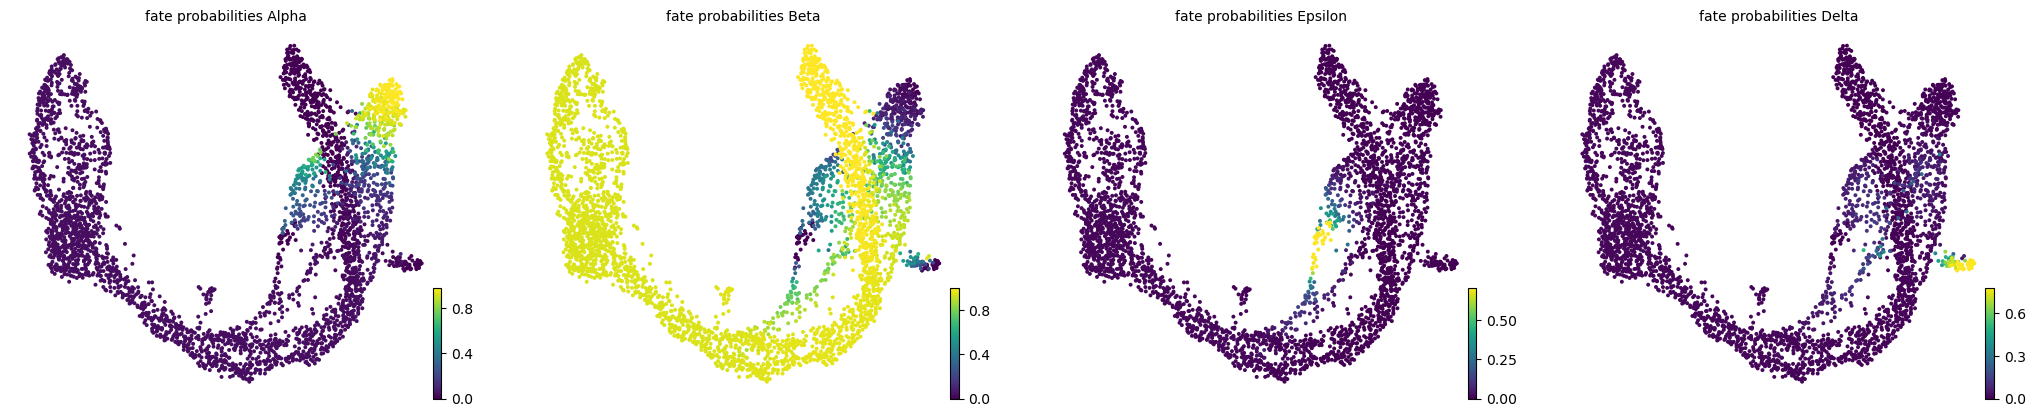

In [38]:
s.compute_fate_probabilities()
s.plot_fate_probabilities(same_plot=False)

In [39]:
beta_df_sto = s.compute_lineage_drivers(
    lineages=["Beta"])
beta_df_sto.head(3)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


,Beta_corr,Beta_pval,Beta_qval,Beta_ci_low,Beta_ci_high
index,,,,,
Rplp0,0.417389,1.015350e-160,1.410612e-158,0.390402,0.443660
Tmsb10,0.408177,6.850919e-153,6.345256e-151,0.380949,0.434697
Nkx6-1,0.390961,5.778303e-139,4.495520e-137,0.363300,0.417934


### scvelo-Dynamic Kernel

In [40]:
dyn_kernel = crpk.VelocityKernel(adata_pan_dyn, backward=False, attr='layers', vkey='velocity')
dyn_kernel.compute_transition_matrix()

Computing transition matrix using `'deterministic'` model


  0%|          | 0/3696 [00:00<?, ?cell/s]

[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors
[0]PETSC ERROR: configure using --with-debugging=yes, recompile, link, and run 
[0]PETSC ERROR: to get more information on the crash.
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors

Using `softmax_scale=5.7239`


  0%|          | 0/3696 [00:00<?, ?cell/s]

    Finish (0:00:04)


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 13 Broken Pipe: Likely while reading or writing to a socket
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: [0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range
[0]PETSC ERROR: Try option -start_in_debugger or -on_error_attach_debugger
[0]PETSC ERROR: or see https://petsc.org/release/faq/#valgrind
[0]PETSC ERROR: or try http://valgrind.org on GNU/linux and Apple MacOS to find memory corruption errors


VelocityKernel[n=3696, model='deterministic', similarity='correlation', softmax_scale=5.724]

In [41]:
y = cr.estimators.GPCCA(dyn_kernel)

Computing Schur decomposition
When computing macrostates, choose a number of states NOT in `[7]`
Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Computing `8` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:02)


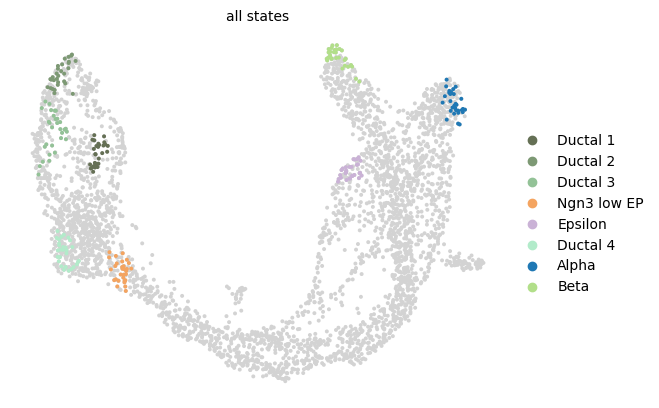

In [43]:
y.fit(cluster_key="clusters", n_states=8)
y.plot_macrostates(which='all', legend_loc='right')

In [44]:
y.set_terminal_states(states=["Alpha", "Beta", "Epsilon"])

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


GPCCA[kernel=VelocityKernel[n=3696], initial_states=None, terminal_states=['Alpha', 'Beta', 'Epsilon']]

Computing fate probabilities


  0%|          | 0/3 [00:00<?, ?/s]

Adding `adata.obsm['lineages_fwd']`
       `.fate_probabilities`
    Finish (0:00:00)


[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: ------------------------------------------------------------------------
[0]PETSC ERROR: Caught signal number 11 SEGV: Segmentation Violation, probably memory access out of range


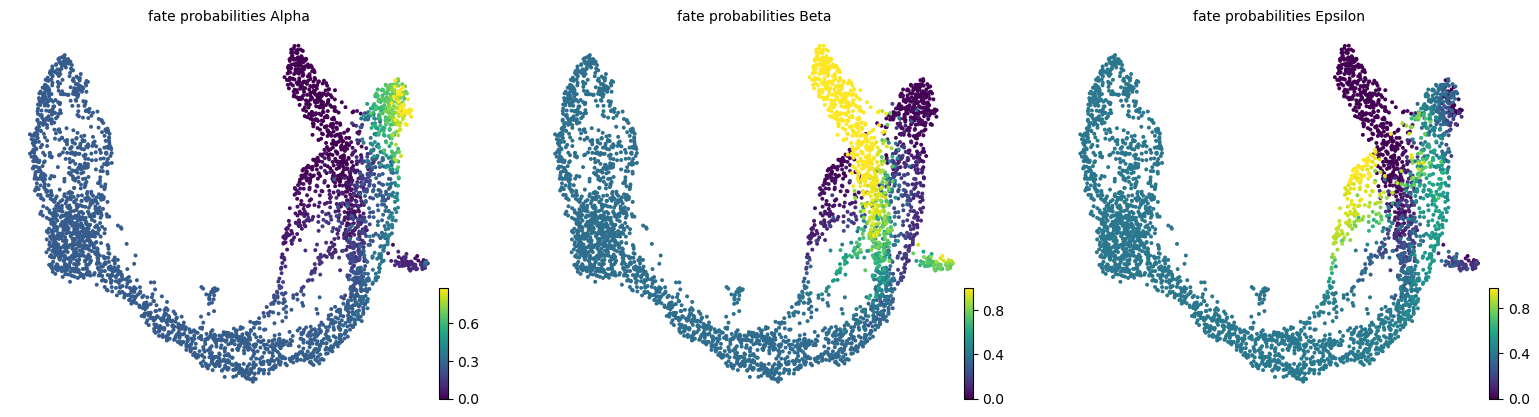

In [45]:
y.compute_fate_probabilities()
y.plot_fate_probabilities(same_plot=False)

In [46]:
beta_df_dyn = y.compute_lineage_drivers(
    lineages=["Beta"])
beta_df_dyn.head(3)

Adding `adata.varm['terminal_lineage_drivers']`
       `.lineage_drivers`
    Finish (0:00:00)


,Beta_corr,Beta_pval,Beta_qval,Beta_ci_low,Beta_ci_high
index,,,,,
Nnat,0.680985,0.0,0.0,0.663307,0.697903
Gng12,0.671418,0.0,0.0,0.653319,0.688749
Ins2,0.622537,0.0,0.0,0.602387,0.641895


# Compare top 100 driver genes for the same lineage

In [47]:
beta_deep = beta_df_deep[['Beta_corr']].rename(columns={'Beta_corr':'DeepVelo'}).nlargest(100, 'DeepVelo').reset_index()
beta_deep['Method'] = 'DeepVelo'
beta_det = beta_df_det[['Beta_corr']].rename(columns={'Beta_corr':'Velocyto'}).nlargest(100, 'Velocyto').reset_index()
beta_det['Method'] = 'Velocyto'
beta_dyn = beta_df_dyn[['Beta_corr']].rename(columns={'Beta_corr':'scv-Dyn'}).nlargest(100, 'scv-Dyn').reset_index()
beta_dyn['Method'] = 'scv_Dyn'
beta_sto = beta_df_sto[['Beta_corr']].rename(columns={'Beta_corr':'scv-Sto'}).nlargest(100, 'scv-Sto').reset_index()
beta_sto['Method'] = 'scv-Sto'
beta_unit = beta_df_unit[['Beta_corr']].rename(columns={'Beta_corr':'UniTVelo'}).nlargest(100, 'UniTVelo').reset_index()
beta_unit['Method'] = 'UniTVelo'

In [48]:
beta_deep = beta_df_deep[['Beta_corr']].rename(columns={'Beta_corr':'DeepVelo'}).nlargest(100, 'DeepVelo')
beta_det = beta_df_det[['Beta_corr']].rename(columns={'Beta_corr':'Velocyto'}).nlargest(100, 'Velocyto')
beta_dyn = beta_df_dyn[['Beta_corr']].rename(columns={'Beta_corr':'scv-Dyn'}).nlargest(100, 'scv-Dyn')
beta_sto = beta_df_sto[['Beta_corr']].rename(columns={'Beta_corr':'scv-Sto'}).nlargest(100, 'scv-Sto')
beta_unit = beta_df_unit[['Beta_corr']].rename(columns={'Beta_corr':'UniTVelo'}).nlargest(100, 'UniTVelo')

In [58]:
big_beta = pd.concat([beta_deep, beta_det, beta_dyn, beta_sto, beta_unit], axis=1).fillna(0)

In [61]:
big_beta.head(3)

,DeepVelo,Velocyto,scv-Dyn,scv-Sto,UniTVelo
index,,,,,
Rplp0,1.0,1.0,0.0,1.0,0.0
Nkx6-1,1.0,1.0,1.0,1.0,0.0
Tmsb10,1.0,1.0,0.0,1.0,0.0


Convert dataframe to boolean: gene either is in the top 100 for the method or it is not

In [60]:
big_beta[big_beta != 0] = 1
big_beta.head(3)

,DeepVelo,Velocyto,scv-Dyn,scv-Sto,UniTVelo
index,,,,,
Rplp0,1.0,1.0,0.0,1.0,0.0
Nkx6-1,1.0,1.0,1.0,1.0,0.0
Tmsb10,1.0,1.0,0.0,1.0,0.0


In [62]:
#save top 100 genes beta dataframe

save_path = ''

#big_beta.to_csv(save_path)

# Create a plot comparing the identified macrostates from each RNA velocity method

In [52]:
macrostate_counts = pd.DataFrame([['DeepVelo', 1, 1, 1, 1, 1, 0, 1, 1, 1, 0], ['Velocyto', 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], ['UniTVelo', 1, 1, 1, 1, 1, 1, 1, 1, 0, 0], 
                   ['scVelo-Stochastic', 1, 1, 1, 0, 0, 1, 1, 1, 1, 1], ['scVelo-Dynamic', 1, 1, 1, 1, 0, 1, 1, 1, 1, 0]], 
                  columns=['Method', 'Ductal 1', 'Ductal 2', 'Ductal 3', 'Ductal 4',
                           'Ductal 5', 'Ngn 3 Low EP', 'Beta', 'Epsilon', 'Alpha', 'Delta']) 

In [53]:
mydf = macrostate_counts.set_index('Method').T

In [54]:
methods_palette = {'DeepVelo': '#0072B5', 
                   
                'scVelo-Dynamic': '#E18727', 
                   'Velocyto': '#00966C',
                  'scVelo-Stochastic':'#CF5073',
                  'UniTVelo': '#4D4398'}

<Figure size 600x400 with 0 Axes>

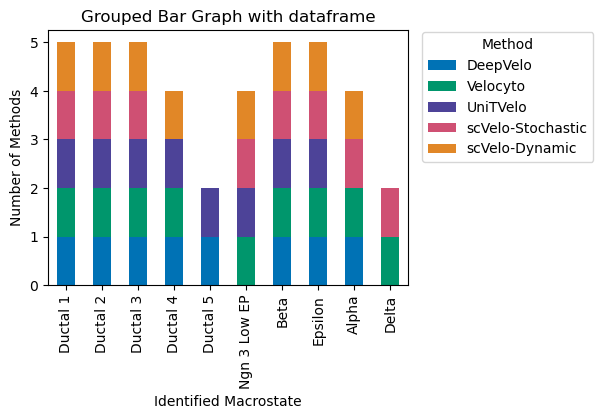

In [56]:
# plot grouped bar chart 
plt.figure(figsize=(6, 4))

mydf.plot(kind='bar', 
        stacked=True, 
        title='Grouped Bar Graph with dataframe', color=methods_palette) 

plt.legend(title='Method', bbox_to_anchor = [1.02, 1.02])
plt.xlabel('Identified Macrostate')
plt.ylabel('Number of Methods')

plt.tight_layout()

plt.gcf().set_size_inches(6, 4)

#plt.savefig('figures/grouped_barplot_methodsmacrostate_pancreas_Oct20.pdf', format='pdf')
plt.show()